# Big Mart Sales Prediction

## 1) Business problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**Data Dictionary**

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

**Train and test files**

CSV containing the item outlet information with a sales value.

**Variable description**
* **item_identifier**: Unique product ID.
* **item_weight**: Weight of product.
* **item_fat_content**: Wheter the product is low fat or not.
* **item_visibility**: The % of the total display area of all products in a store allocated to the particular product.
* **item_type**: The category to which the product belongs.
* **item_mrp**: Maximum retail price (list price) of the product.
* **outlet_identifier**: Unique store id.
* **outlet_establishment_year**: The year in which the store was stablished.
* **outlet_size**: The size of the store in terms of gound area covered.
* **outlet_location_type**: The type of city in which the store is located.
* **outlet_type**: Whether the outlet is just a grocery store or some sort of supermarket.
* **item_outlet_sales** *(Only train file)*: Sales of the product in *t* particular store. This is the outcome variable to be predicted.

### 1.1) Imports and Load Data

In [187]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder, StandardScaler


import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")
sns.set(rc={'figure.figsize':(9,4)})

In [63]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.columns = [col.lower() for col in df_train.columns]
df_test.columns = [col.lower() for col in df_test.columns]

print(df_train.shape)
display(df_train.head())

print(df_test.shape)
display(df_test.head())

(8523, 12)


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(5681, 11)


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 2) EDA - Exploratory Data Analysis

In [64]:
df_train.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [65]:
df_test.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [66]:
df_train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

### 2.1) Item Identifier

In [67]:
print('Null values: {}'.format(df_train['item_identifier'].isnull().sum()))

Null values: 0


In [68]:
df_train.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [69]:
pl_items = df_train.groupby(['item_identifier', 'item_type'], as_index=False)['item_identifier']\
    .agg(['count']).sort_values(by=['count'], ascending=False).head(10).reset_index()

pl_items['item_identifier_type'] = pl_items.apply(lambda row: '{} - {}'.format(row.item_identifier, row.item_type), axis=1)

display(pl_items.shape)
pl_items.head()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=pl_items['item_identifier_type'],
    y=pl_items['count'],

    text= pl_items['count']
))

fig.update_layout(
    title='<span>Items identifier counts</span>',
    autosize=False,
    width=1000,
    height=500,
    xaxis=dict(title='<span>Item identifier & type</span>'),
    yaxis=dict(title='<span>Count</span>'),
)

(10, 4)

### 2.2) Item Fat Content

In [70]:
df_train['item_fat_content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

In [71]:
df_test['item_fat_content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: item_fat_content, dtype: int64

In [72]:
item_fat_content_map = {
    'Low Fat': 'low fat',
    'LF': 'low fat',
    'low fat': 'low fat',

    'Regular': 'regular',
    'reg': 'regular'
}

df_train['item_fat_content'] = df_train['item_fat_content'].map(item_fat_content_map)
df_test['item_fat_content'] = df_test['item_fat_content'].map(item_fat_content_map)

### 2.3) Item Weight

In [75]:
print('[Train] Null values: {}'.format(df_train['item_weight'].isnull().sum()))
print(' [Test] Null values: {}'.format(df_test['item_weight'].isnull().sum()))

[Train] Null values: 1463
 [Test] Null values: 976


Skewness: 0.0824262091221237
Kurtosis: -1.2277664144376634


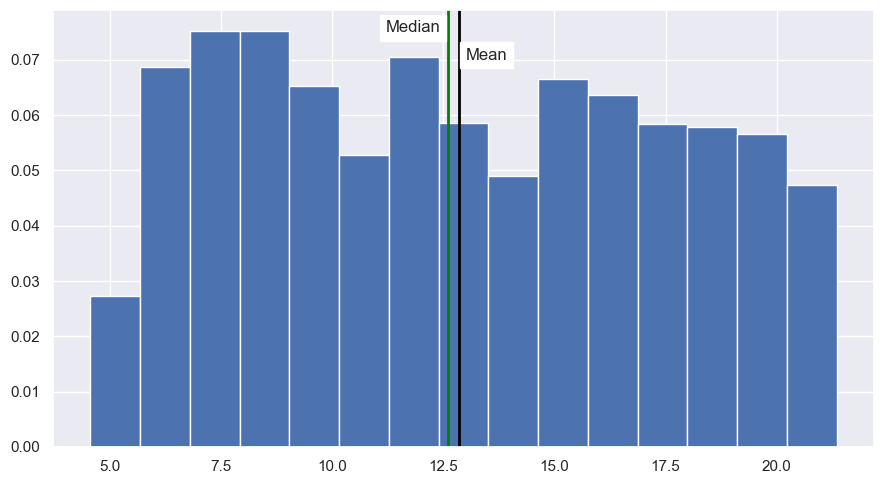

In [76]:
print('Skewness: {}'.format(df_train['item_weight'].skew()))
print('Kurtosis: {}'.format(df_train['item_weight'].kurtosis()))

fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(df_train['item_weight'], bins=15, density=True)
ax.axvline(x = df_train['item_weight'].mean(), color='black', lw=2)
ax.text(13, 0.07, 'Mean', bbox={'facecolor':'white'})

ax.axvline(x = df_train['item_weight'].median(), color='green', lw=2)
ax.text(11.2, 0.075, 'Median', bbox={'facecolor':'white'})

plt.tight_layout()
plt.show()
# sns.histplot(df_train['item_weight'], kde=True, bins=15)

A distribuição dos pesos é levemente assimétrica à direita, pois o skewness é > 0.

<Axes: >

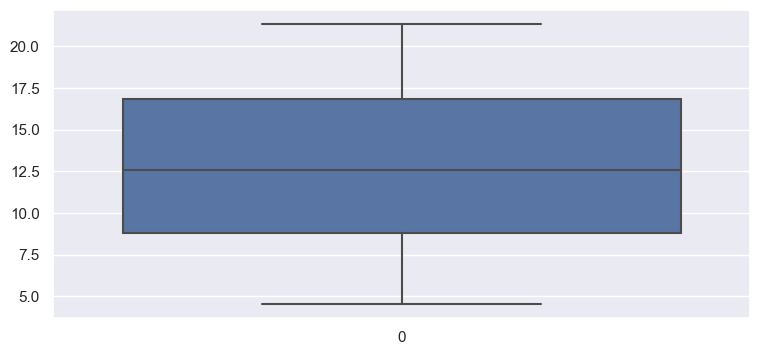

In [77]:
pl_weight = df_train['item_weight']

sns.boxplot(pl_weight)

Os dados estão equilibrados entre os quantis.

In [78]:
pl_weight = df_train.reset_index().groupby(['item_identifier', 'item_weight'], as_index=False)['index'].agg('count')

pl_weight.columns = ['item_identifier', 'item_weight', 'count']

pl_weight['item_identifier'].value_counts().sort_values(ascending=False)

DRA12    1
DRF51    1
DRA59    1
DRB01    1
DRB13    1
        ..
NCZ42    1
NCZ53    1
NCY54    1
NCX42    1
NCZ54    1
Name: item_identifier, Length: 1555, dtype: int64

Não há produtos com os pesos repetidos.

In [79]:
def findItemWeightTrain(id):
    val = df_train.loc[df_train['item_identifier'] == id, 'item_weight'].median()
    return val

def findItemWeightTest(id):
    val = df_test.loc[df_test['item_identifier'] == id, 'item_weight'].median()
    return val



In [80]:
df_train.loc[df_train['item_weight'].isnull(), 'item_weight'] = df_train['item_identifier'].apply(lambda x: findItemWeightTrain(x))
df_test.loc[df_test['item_weight'].isnull(), 'item_weight'] = df_test['item_identifier'].apply(lambda x: findItemWeightTest(x))

In [81]:
df_train = df_train.sort_values(by=['item_type', 'item_fat_content', 'item_mrp'])
df_train['item_weight_shift'] = df_train['item_weight'].shift(1)
df_train.loc[df_train['item_weight'].isnull(), 'item_weight'] = df_train['item_weight_shift'] 


df_test = df_test.sort_values(by=['item_type', 'item_fat_content', 'item_mrp'])
df_test['item_weight_shift'] = df_test['item_weight'].shift(1)
df_test.loc[df_test['item_weight'].isnull(), 'item_weight'] = df_test['item_weight_shift']

df_test['item_weight_shift'] = df_test['item_weight'].shift(1)
df_test.loc[df_test['item_weight'].isnull(), 'item_weight'] = df_test['item_weight_shift']

df_train.drop(columns=['item_weight_shift'], inplace=True)
df_test.drop(columns=['item_weight_shift'], inplace=True)

---

### 2.4) Item Type

In [90]:
df_train['item_type'].value_counts().sort_index()

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: item_type, dtype: int64

In [91]:
df_test['item_type'].value_counts().sort_index()

Baking Goods             438
Breads                   165
Breakfast                 76
Canned                   435
Dairy                    454
Frozen Foods             570
Fruits and Vegetables    781
Hard Drinks              148
Health and Hygiene       338
Household                638
Meat                     311
Others                   111
Seafood                   25
Snack Foods              789
Soft Drinks              281
Starchy Foods            121
Name: item_type, dtype: int64

---

### 2.5) Item Visibility

Skewness: 1.1670905496918405
Kurtosis: 1.6794454826024237


<Axes: xlabel='item_visibility', ylabel='Count'>

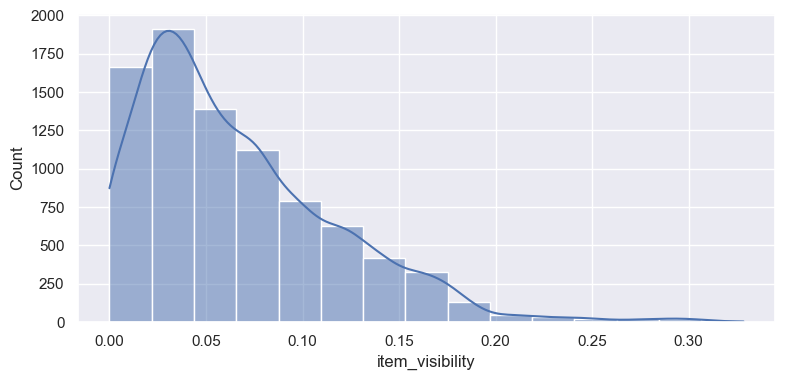

In [94]:
print('Skewness: {}'.format(df_train['item_visibility'].skew()))
print('Kurtosis: {}'.format(df_train['item_visibility'].kurtosis()))

sns.histplot(df_train['item_visibility'], kde=True, bins=15)

<Axes: >

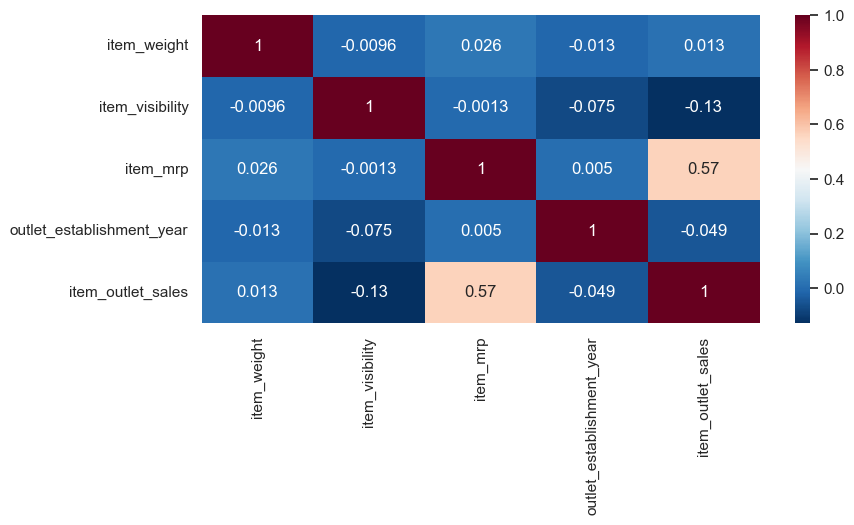

In [98]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdBu_r')

<Axes: >

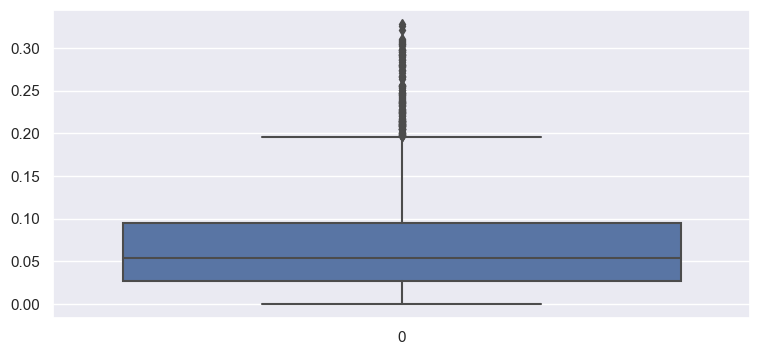

In [99]:
sns.boxplot(df_train['item_visibility'])

---

### 2.6) Item MRP

Train dataset
Skewness: 0.1272022683110526
Kurtosis: -0.8897690936963571
Test dataset
Skewness: 0.13618153880370937
Kurtosis: -0.9002034997582533


<Axes: xlabel='item_mrp', ylabel='Count'>

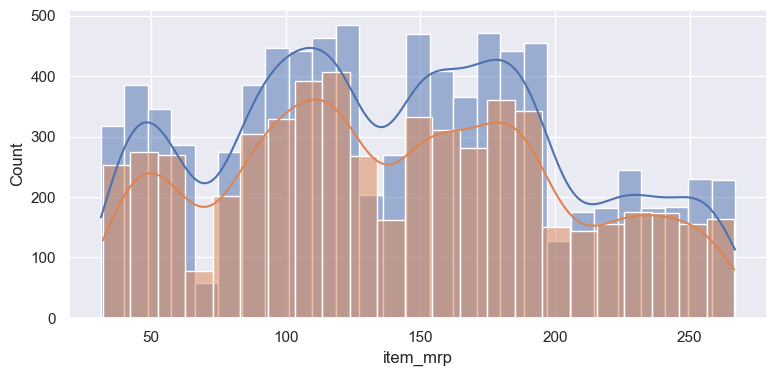

In [106]:
print('Train dataset')
print('Skewness: {}'.format(df_train['item_mrp'].skew()))
print('Kurtosis: {}'.format(df_train['item_mrp'].kurtosis()))

print('Test dataset')
print('Skewness: {}'.format(df_test['item_mrp'].skew()))
print('Kurtosis: {}'.format(df_test['item_mrp'].kurtosis()))

sns.histplot(df_train['item_mrp'], kde=True)
sns.histplot(df_test['item_mrp'], kde=True)


<Axes: >

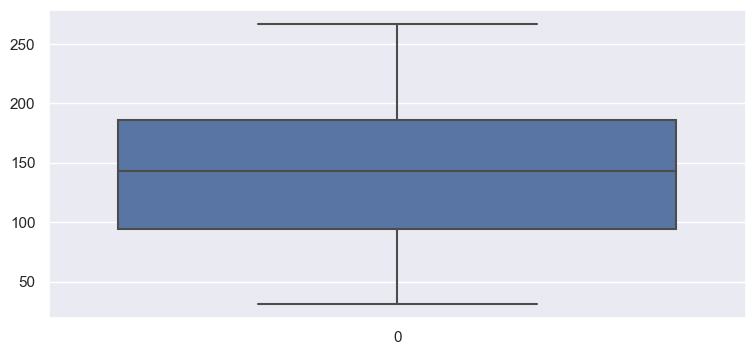

In [109]:
display(sns.boxplot(df_train['item_mrp']))

<Axes: >

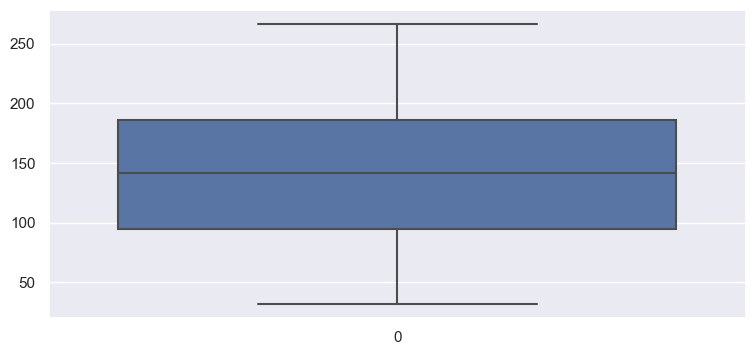

In [110]:
display(sns.boxplot(df_test['item_mrp']))

### 2.7) Outlet Identifier

In [113]:
display(df_train['outlet_identifier'].value_counts().sort_index())
display(df_test['outlet_identifier'].value_counts().sort_index())

OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: outlet_identifier, dtype: int64

OUT010    370
OUT013    621
OUT017    617
OUT018    618
OUT019    352
OUT027    624
OUT035    620
OUT045    619
OUT046    620
OUT049    620
Name: outlet_identifier, dtype: int64

### 2.8) Outlet Establishment Year

In [115]:
df_train['outlet_establishment_year'].value_counts().sort_index()

1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: outlet_establishment_year, dtype: int64

### 2.9) Outlet size

In [143]:
print('Null values: {}'.format(df_train['outlet_size'].isnull().sum()))

Null values: 2410


In [116]:
df_train['outlet_size'].value_counts()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

In [120]:
df_train.groupby(['outlet_size'])['item_outlet_sales'].agg(['sum', 'count']).reset_index().sort_values(by=['outlet_size'], ascending=False)

,outlet_size,sum,count
2,Small,4.566212e+06,2388
1,Medium,7.489719e+06,2793
0,High,2.142664e+06,932


### 2.10) Outlet Location Type

In [122]:
df_train['outlet_location_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [123]:
df_train.groupby(['outlet_location_type'])['item_outlet_sales']\
                .agg(['sum', 'count'])\
                .reset_index()\
                .sort_values(by=['outlet_location_type'], ascending=False)

,outlet_location_type,sum,count
2,Tier 3,7.636753e+06,3350
1,Tier 2,6.472314e+06,2785
0,Tier 1,4.482059e+06,2388


### 2.11) Outlet Type

In [124]:
df_train['outlet_type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64

### 2.12) Item Outlet Sales

<Axes: xlabel='item_outlet_sales', ylabel='Count'>

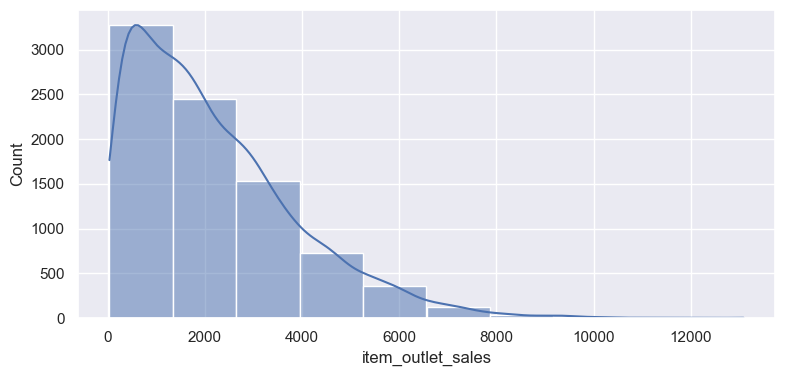

In [128]:
sns.histplot(df_train['item_outlet_sales'], kde=True, bins=10)

<Axes: >

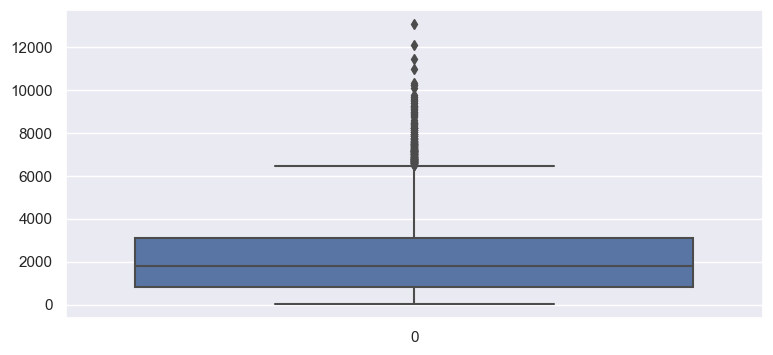

In [129]:
sns.boxplot(df_train['item_outlet_sales'])

In [142]:
mean = df_train['item_outlet_sales'].mean()
std = df_train['item_outlet_sales'].std()

lower = mean - (3 * std)
upper = mean + (3 * std)

print(f'Upper fence: {upper}')
print(f'Lower fence: {lower}')

df_train['outlier_sales'] = '0'
df_train.loc[df_train['item_outlet_sales'] < lower, 'outlier_sales'] = '1'
df_train.loc[df_train['item_outlet_sales'] > upper, 'outlier_sales'] = '1'


px.scatter(x = df_train['item_outlet_sales'], y = df_train['item_outlet_sales'], color=df_train['outlier_sales'])


Upper fence: 7300.787760776523
Lower fence: -2938.209933626459


In [174]:
df_train.drop(columns=['outlier_sales'], inplace=True)

---

## 3) Data Encoding

In [175]:
df_train.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type         float64
outlet_type                   object
item_outlet_sales            float64
dtype: object

### 3.1) Item Fat Content

In [176]:
df_train['item_fat_content'].value_counts()

1    5517
0    3006
Name: item_fat_content, dtype: int64

In [146]:
map_item_fat = {
    'regular': 0,
    'low fat': 1
}

df_train['item_fat_content'] = df_train['item_fat_content'].map(map_item_fat)
df_test['item_fat_content'] = df_test['item_fat_content'].map(map_item_fat)

### 3.2) Outlet Location Type

In [177]:
df_train['outlet_location_type'].value_counts()

1.0    3350
0.5    2785
0.0    2388
Name: outlet_location_type, dtype: int64

In [170]:
map_outlet_location_type = {
    'Tier 1': 0,
    'Tier 2': 0.5,
    'Tier 3': 1
}

df_train['outlet_location_type'] = df_train['outlet_location_type'].map(map_outlet_location_type)
df_test['outlet_location_type'] = df_test['outlet_location_type'].map(map_outlet_location_type)

### 3.3) Item Type, Outlet Identifier and Outlet Type

In [178]:
df_train['item_type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [179]:
class MyHotEncoder:
    def __init__(self, df, cols):
        self.df = df
        self.list_oneHotEncoder = []
        self.list_col = []

        if isinstance(cols, list):
            self.list_col = cols
        else:
            self.list_col.append(cols)

    #Treina os dados passados.
    def fit_transform(self):

        self.df.reset_index(drop=True, inplace=True) #Reseta o index do dataset para não causar problemas
        X = self.df.values

        #Para cada coluna crie uma string contendo o nome do atributo e o nome da categoria.
        #Exemplo de saída: [sex_male]
        for col in self.list_col: 
            valores = list(self.df[col].sort_values().unique())
            colunas = []
            for i in valores:
                colunas.append(col + '_' + str(i))
            colunas = colunas + list(self.df.columns)
            
            #One hot encoder para treinar
            onehotencoder = OneHotEncoder(handle_unknown='ignore')
            self.list_oneHotEncoder.append(onehotencoder)

            enc_df = onehotencoder.fit_transform(self.df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)
            
            #União do dataset gerado ao dataset original
            self.df = enc_df.join(self.df)
            self.df.columns = colunas
            self.df.drop(col, axis=1, inplace=True)
        
        return self.df

    #Apenas aplica a transformação a novos dados.
    def transform(self, df):
        
        for i in range(len(self.list_col)):
            col = self.list_col[i]

            valores = list(df[col].sort_values().unique())
            colunas = []
            for j in valores:
                colunas.append(col + '_' + str(j))
            colunas = colunas + list(df.columns)

            #One hot encoder para transformar
            enc_df = self.list_oneHotEncoder[i].transform(df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)

            #União do dataset gerado ao dataset original
            df = enc_df.join(df)
            df.columns = colunas
            df.drop(col, axis=1, inplace=True)

        return df   

In [180]:
df_copy = df_train.copy()

ohe = MyHotEncoder(df_copy, ['item_type', 'outlet_identifier', 'outlet_type'])

df_train_copy = ohe.fit_transform()
df_test_copy = ohe.transform(df_test)

In [184]:
df_train_copy.drop(columns=['outlet_type_Grocery Store', 'outlet_identifier_OUT010', 'item_type_Baking Goods'], inplace=True)
df_test_copy.drop(columns=['outlet_type_Grocery Store', 'outlet_identifier_OUT010', 'item_type_Baking Goods'], inplace=True)

---

### 4) Data Standardization

In [193]:
scaler = StandardScaler()

stand_item_mrp_train = scaler.fit_transform(df_train_copy[['item_mrp']])
stand_item_mrp_test = scaler.transform(df_test_copy[['item_mrp']])

In [194]:
df_train_copy['item_mrp'] = stand_item_mrp_train
df_test_copy['item_mrp'] = stand_item_mrp_test

## 5) Feature Selection

### 5.1) Removing Unnecessary Columns

In [196]:
df_train_copy.drop(columns=['item_identifier', 'outlet_establishment_year', 'outlet_size'], inplace=True)
df_test_copy.drop(columns=['item_identifier', 'outlet_establishment_year', 'outlet_size'], inplace=True)

### 5.2) Feature selection using techniques

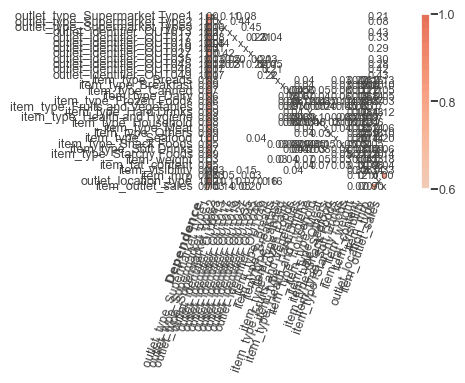

In [199]:
import rfpimp
rfpimp.plot_dependence_heatmap(
    rfpimp.feature_dependence_matrix(df_train_copy),
    # value_fontsize=12,
    # label_fontsize=14,
    # figsize=(8, 8)
)
fig = plt.gcf()

In [165]:
df_train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlier_sales
3140,FDT36,12.300,1,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.5984,0
6828,FDT36,12.300,1,0.111275,Baking Goods,35.0874,OUT046,1997,Small,Tier 1,Supermarket Type1,458.7362,0
5139,FDT36,12.300,1,0.110736,Baking Goods,35.2874,OUT027,1985,Medium,Tier 3,Supermarket Type3,988.0472,0
2624,FDT36,12.300,1,0.111500,Baking Goods,35.6874,OUT045,2002,NaN,Tier 2,Supermarket Type1,846.8976,0
7691,FDW23,5.765,1,0.081944,Baking Goods,36.7164,OUT013,1987,High,Tier 3,Supermarket Type1,849.5608,0


In [151]:
df_copy = df_train.copy()